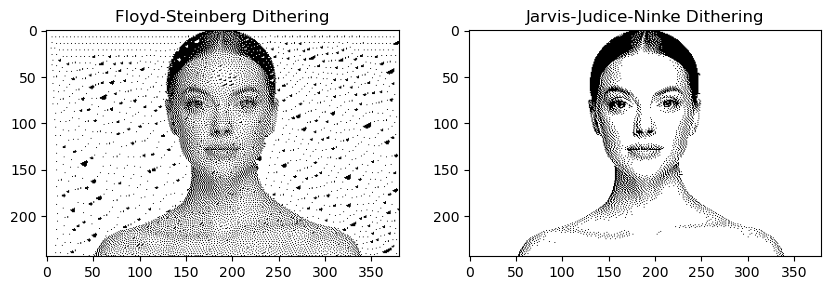

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Floyd-Steinberg dithering algorithm
def floyd_steinberg_dithering(input_image):
    # Convert the input image to grayscale
    grayscale_image = input_image.convert('L')
    grayscale_image_array = np.array(grayscale_image)
    height, width = grayscale_image_array.shape
    
    # Copy of the grayscale image to apply dithering
    dithered_image = grayscale_image_array.copy()

    # Loop over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Get the current pixel value and threshold it to either 0 or 255 (black or white)
            current_pixel_value = dithered_image[y, x]
            new_pixel_value = 255 * (current_pixel_value > 128)  # Binarize pixel based on threshold 128
            dithered_image[y, x] = new_pixel_value
            
            # Calculate the quantization error
            quantization_error = current_pixel_value - new_pixel_value

            # Distribute the quantization error to neighboring pixels
            if x < width - 1:
                dithered_image[y, x + 1] += quantization_error * 7 / 16
            if y < height - 1:
                dithered_image[y + 1, x] += quantization_error * 5 / 16
                if x > 0:
                    dithered_image[y + 1, x - 1] += quantization_error * 3 / 16
                if x < width - 1:
                    dithered_image[y + 1, x + 1] += quantization_error * 1 / 16

    # Return the dithered image
    return Image.fromarray(np.clip(dithered_image, 0, 255).astype(np.uint8))

# Jarvis-Judice-Ninke dithering algorithm
def jarvis_dithering(input_image):
    # Convert the input image to grayscale
    grayscale_image = input_image.convert('L')
    grayscale_image_array = np.array(grayscale_image)
    height, width = grayscale_image_array.shape
    
    # Copy of the grayscale image to apply dithering
    dithered_image = grayscale_image_array.copy()

    # Loop over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Get the current pixel value and threshold it to either 0 or 255 (black or white)
            current_pixel_value = dithered_image[y, x]
            new_pixel_value = 255 * (current_pixel_value > 128)  # Binarize pixel based on threshold 128
            dithered_image[y, x] = new_pixel_value

            # Calculate the quantization error
            quantization_error = current_pixel_value - new_pixel_value

            # Distribute the quantization error to neighboring pixels (more neighbors than Floyd-Steinberg)
            if x < width - 1:
                dithered_image[y, x + 1] += quantization_error * 7 / 48
            if x < width - 2:
                dithered_image[y, x + 2] += quantization_error * 5 / 48
            if y < height - 1:
                dithered_image[y + 1, x] += quantization_error * 5 / 48
                if x > 0:
                    dithered_image[y + 1, x - 1] += quantization_error * 3 / 48
                if x < width - 1:
                    dithered_image[y + 1, x + 1] += quantization_error * 3 / 48
                if x < width - 2:
                    dithered_image[y + 1, x + 2] += quantization_error * 1 / 48

    # Return the dithered image
    return Image.fromarray(np.clip(dithered_image, 0, 255).astype(np.uint8))

# Load the image from file
input_image = Image.open('image.jpg')  # Replace 'image.jpg' with your image path

# Apply Floyd-Steinberg and Jarvis-Judice-Ninke dithering algorithms
floyd_dithered_image = floyd_steinberg_dithering(input_image)
jarvis_dithered_image = jarvis_dithering(input_image)

# Display the results using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(floyd_dithered_image, cmap='gray'); plt.title('Floyd-Steinberg Dithering')
plt.subplot(1, 2, 2); plt.imshow(jarvis_dithered_image, cmap='gray'); plt.title('Jarvis-Judice-Ninke Dithering')
plt.show()


The comparison of the results obtained from the Floyd-Steinberg and Jarvis-Judice-Ninke dithering methods reveals distinct differences in their visual appearance, noise characteristics, and computational costs.

Floyd-Steinberg dithering tends to produce a more speckled or grainy appearance, characterized by noticeable error diffusion that leads to patterns in the noise and pronounced diagonal streaks. The noise generated by this method is generally more directional due to its specific error diffusion pattern. Additionally, Floyd-Steinberg is typically considered faster in terms of computational cost compared to Jarvis-Judice-Ninke.

In contrast, Jarvis-Judice-Ninke dithering creates a less speckled and more homogeneous appearance, with noise distributed more evenly across the image. The noise produced by this method is visually uniform and less directional than that of Floyd-Steinberg. However, this approach is more computationally expensive because it involves a wider diffusion of error.